# Prepare faces data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import imageio
import glob

In [2]:
png = []
labels = []
i = 0
for image_path in glob.glob("../cartoon/cartoonset10k/*.png"):
    labels.append(str(image_path)[24:-4])  #[16:-4]
    png.append(imageio.imread(image_path))
    i += 1
    if i%500==0:
        print(str(i) + '/10000')

im = np.asarray(png)

500/10000
1000/10000
1500/10000
2000/10000
2500/10000
3000/10000
3500/10000
4000/10000
4500/10000
5000/10000
5500/10000
6000/10000
6500/10000
7000/10000
7500/10000
8000/10000
8500/10000
9000/10000
9500/10000
10000/10000


In [7]:
im.shape

(10000, 500, 500, 4)

In [8]:
np.save('../data/cartoon_full.npy', im)

In [10]:
flat = im.reshape((im.shape[0], -1))

In [12]:
flat[0]

array([255, 255, 255, ..., 255, 255,   0], dtype=uint8)

In [75]:
import pickle

with open('cartoon_rep_labels', 'wb') as fp:
    pickle.dump(labels, fp)

In [76]:
with open ('cartoon_rep_labels', 'rb') as fp:
    itemlist = pickle.load(fp)

In [79]:
itemlist[:10]

['10398371138482662938',
 '1022724317930192998',
 '10410419915843824966',
 '11270409558439850835',
 '10412294937479957813',
 '11178336740176879122',
 '11391451993150750250',
 '10307426243381151655',
 '11448917844015282436',
 '10596392440506159736']

5132
onset10k/cs10748802509720391033


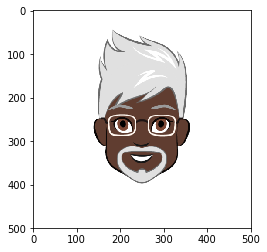

In [61]:
k = np.random.randint(10000)
print(k)
print(labels[k])  # hair 15 (109)
plt.imshow(im[k])  # o: 80 u: 50 l:100 r:100

In [62]:
crop = im[:,100:-100,80:-50,:]
crop.shape

(10000, 300, 370, 4)

In [163]:
crop2 = crop[:,:,20:-50,:]
crop2.shape

(10000, 300, 300, 4)

8082
onset10k/cs10238414291921853829


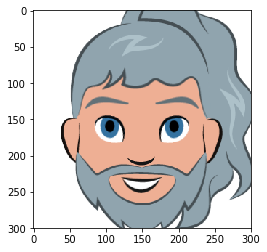

In [211]:
k = np.random.randint(10000)
print(k)
print(labels[k])
plt.imshow(crop2[k,:,:,:])
#plt.imshow(crop[k,:,:,1])
#plt.imshow(crop[k,:,:,2])
#plt.imshow(crop[k,:,:,3])

In [208]:
np.save('../cartoon/cartoon_crop.npy', crop2)

In [212]:
import os 
HOME_PATH = os.path.join(os.path.expanduser('~'))
SOURCE_FILE = os.path.join(HOME_PATH,'Documents', 'test_umap', 'cartoon', 'cartoon_crop.npy')
print(SOURCE_FILE[-3:])

npy


In [209]:
crop_grey = crop2[:,:,:,0]
crop_grey.shape

(10000, 300, 300)

In [210]:
np.save('../cartoon/cartoon_crop_grey.npy', crop_grey)

In [6]:
im_df = im.reshape((im.shape[0], -1))

im_df.shape

(10000, 1000000)

In [7]:
df = pd.DataFrame(im_df, index=pd.Series(labels))

df.head()

,0,1,2,3,4,5,6,7,8,9,...,999990,999991,999992,999993,999994,999995,999996,999997,999998,999999
10398371138482662938,255,255,255,0,255,255,255,0,255,255,...,255,0,255,255,255,0,255,255,255,0
1022724317930192998,255,255,255,0,255,255,255,0,255,255,...,255,0,255,255,255,0,255,255,255,0
10410419915843824966,255,255,255,0,255,255,255,0,255,255,...,255,0,255,255,255,0,255,255,255,0
11270409558439850835,255,255,255,0,255,255,255,0,255,255,...,255,0,255,255,255,0,255,255,255,0
10412294937479957813,255,255,255,0,255,255,255,0,255,255,...,255,0,255,255,255,0,255,255,255,0


In [8]:
im_small = im[:,:,:,0]

im_small.shape

(10000, 500, 500)

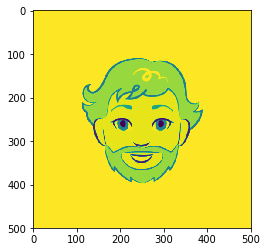

In [9]:
plt.imshow(im_small[0])

In [19]:
flat_im = im_small.reshape(im_small.shape[0], -1)

col_header = [str(i) for i in range(flat_im.shape[1])]

small_df = pd.DataFrame(flat_im, index=pd.Series(labels), columns=col_header)

small_df.head()

,0,1,2,3,4,5,6,7,8,9,...,249990,249991,249992,249993,249994,249995,249996,249997,249998,249999
10398371138482662938,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1022724317930192998,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
10410419915843824966,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
11270409558439850835,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
10412294937479957813,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [20]:
small_df.to_parquet('cartoon.parquet')

In [21]:
sdf = small_df.to_sparse()

sdf.density

TypeError: 'float' object is not callable

In [23]:
sdf.head()

,0,1,2,3,4,5,6,7,8,9,...,249990,249991,249992,249993,249994,249995,249996,249997,249998,249999
10398371138482662938,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1022724317930192998,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
10410419915843824966,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
11270409558439850835,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
10412294937479957813,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [24]:
import scipy.sparse as sps

sparse_im = sps.csr_matrix(small_df.values.T)

sparse_im.shape

(250000, 10000)

In [30]:
sps.save_npz('sparse_array.npz', sparse_im, compressed=True)

In [31]:
sp_im = sps.load_npz('sparse_array.npz')

In [32]:
sp_im.shape

(250000, 10000)

In [33]:
small_df.head()

,0,1,2,3,4,5,6,7,8,9,...,249990,249991,249992,249993,249994,249995,249996,249997,249998,249999
10398371138482662938,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1022724317930192998,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
10410419915843824966,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
11270409558439850835,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
10412294937479957813,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [37]:
small_df.to_feather('wind.feather')

ValueError: feather does not support serializing <class 'pandas.core.indexes.base.Index'> for the index; you can .reset_index()to make the index into column(s)

In [38]:
reset = small_df.copy()

In [40]:
reset = reset.reset_index()

In [41]:
reset.head()

,index,0,1,2,3,4,5,6,7,8,...,249990,249991,249992,249993,249994,249995,249996,249997,249998,249999
0,10398371138482662938,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,1022724317930192998,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,10410419915843824966,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,11270409558439850835,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,10412294937479957813,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [42]:
reset.to_feather('cartoon.feather')

In [43]:
type(sp_im)

scipy.sparse.csr.csr_matrix

In [44]:
sp_im[:10000].shape

(10000, 10000)

In [2]:
rep = np.load('cartoon_rep.npy')

In [4]:
rep.shape

(10000, 2)

In [19]:
meta = ['hi']
type(meta)

list

In [5]:
rep[:5]

array([[-2.9836354 , -6.0781846 ],
       [-0.05413937, -5.9064775 ],
       [ 0.21037906, -2.7899387 ],
       [-4.7923713 , -4.4859047 ],
       [-2.5107193 , -1.9220873 ]], dtype=float32)

In [21]:
header = ["eye_angle", "eye_lashes", "eye_lid", "chin_length", "eyebrow_weight", "eyebrow_shape", "eyebrow_thickness", "face_shape", "facial_hair", "hair", "eye_color", "face_color", "hair_color", "glasses", "glasses_color", "eye_slant", "eyebrow_width", "eye_eyebrow_distance"]
df = pd.DataFrame(columns=header)
labels = []
i = 0
for txt_path in glob.glob("../cartoon/cartoonset10k/*.txt"):
    labels.append(str(txt_path)[16:-4])
    
    with open(txt_path) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        attr_list = []
        for row in csv_reader:
            attr_list.append(int(row[1][1:]))
        # print(attr_list)
    #data = list(zip(header, attr_list))
    #print(data)
    df2 = pd.Series(attr_list, index=header)
    # print(df2)
    #print(df2.head())
    df = df.append(df2, ignore_index=True)
    
    # print(df.head())
    i += 1
    if i%500==0:
        print(str(i) + '/10000')

df['labels'] = pd.Series(labels)
df.head()

NameError: name 'csv' is not defined

In [58]:
df.shape

(10000, 19)

In [17]:
? df.append()

Object ` df.append()` not found.


In [15]:
n_classes = [3, 2, 2, 3, 2, 14, 4, 7, 15, 111, 5, 11, 10, 12, 7, 3, 3, 3]
len(n_classes)

18

In [56]:
rep = np.load('cartoon_sparse_rep.npy')

In [57]:
rep.shape

(10000, 2)

In [60]:
df['x'] = rep[:,0]
df['y'] = rep[:,1]

In [63]:
df = df.drop(columns=['x', 'y'])
df.head()

,eye_angle,eye_lashes,eye_lid,chin_length,eyebrow_weight,eyebrow_shape,eyebrow_thickness,face_shape,facial_hair,hair,eye_color,face_color,hair_color,glasses,glasses_color,eye_slant,eyebrow_width,eye_eyebrow_distance,labels
0,1,1,0,0,0,3,1,0,11,2,4,0,1,7,3,2,1,2,10779933264640970294
1,2,1,1,1,0,7,1,6,5,14,1,0,3,6,2,0,1,1,10009352872467270837
2,1,0,0,1,0,8,1,3,14,4,4,0,8,11,3,1,1,0,1041129064993214383
3,2,0,0,0,0,11,1,3,6,103,2,8,3,4,1,0,2,2,11027727704758822538
4,1,0,1,1,0,0,2,0,14,67,4,6,5,6,2,0,0,1,11410738137183428275


In [64]:
df.to_feather('cartoon_attr.feather')

In [ ]:
def load_labels():
    df = feather.read_dataframe('../cartoon/cartoon_attr.feather')
    df_labels = pd.DataFrame()

    with open ('../cartoon/cartoon_rep_labels', 'rb') as fp:
        df_labels['labels'] = pickle.load(fp)
    
    df_labels = pd.merge(df_labels, df, on='labels', how='outer', suffixes=('', ''))

    if df_labels.isna().sum().sum():
        warn('Please check that data is complete. There are NaNs.')
    
    print('Dataframe with shape ({}, {})'.format(*(df_labels.shape)))
    
    return df_labels

In [4]:
import umap
import time

In [5]:
X = np.load('../cartoon/cartoon_crop.npy')

In [6]:
X = X.reshape((X.shape[0], -1))

In [8]:
args = {'n_neighbors':5}

embedding = umap.UMAP(**args)

In [9]:
t = time.process_time()
rep = embedding.fit_transform(X)  #numba error >=0.44
elapsed_time_fit = time.process_time() - t

/Users/christopherreiners/anaconda3/envs/holoviz-tutorial/lib/python3.6/site-packages/umap/rp_tree.py:450: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "make_euclidean_tree" failed type inference due to: Cannot unify RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none) and RandomProjectionTreeNode(none, bool, array(float32, 1d, C), float64, RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none), RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none)) for '$14.16', defined at /Users/christopherreiners/anaconda3/envs/holoviz-tutorial/lib/python3.6/site-packages/umap/rp_tree.py (457)

File "../../../anaconda3/envs/holoviz-tutorial/lib/python3.6/site-packages/umap/rp_tree.py", line 457:
def make_euclidean_tree(data, indices, rng_state, leaf_size=30):
    <source elided>

        left_node = make_euclidean_tree(data, left_indices, rng_state, leaf_size)
        ^

[1] Durin

In [14]:
elapsed_time_fit / 438

2.479924867579909

In [11]:
elapsed_time_fit/60

18.103451533333335

In [12]:
438/60

7.3

In [15]:
elapsed_time_fit

1086.207092